# Flower Detector

In [11]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random as rn

import cv2
from tqdm import tqdm
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [12]:
pwd

'/content'

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
my_data= '/content/drive/MyDrive/DL_assignment/flowers'
my_data

'/content/drive/MyDrive/DL_assignment/flowers'

In [15]:
os.listdir(my_data)

['rose', 'daisy', 'tulip', 'dandelion', 'sunflower']

In [16]:
X = []
Z = []
IMG_SIZE = 150
FLOWER_DAISY_DIR = my_data + '/daisy/'
FLOWER_SUNFLOWER_DIR = my_data + '/sunflower/'
FLOWER_TULIP_DIR = my_data + '/tulip/'
FLOWER_DANDI_DIR = my_data + '/dandelion/'
FLOWER_ROSE_DIR = my_data + '/rose/'
FLOWER_ROSE_DIR

'/content/drive/MyDrive/DL_assignment/flowers/rose/'

In [17]:
data_folder = '/content/drive/MyDrive/DL_assignment/flowers'

import os
import shutil

train_folder = os.path.join(data_folder, 'train')
test_folder = os.path.join(data_folder, 'test')

train_folder

'/content/drive/MyDrive/DL_assignment/flowers/train'

In [18]:
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [19]:
for flower_class in classes:

    train_class_folder = os.path.join(train_folder, flower_class)
    test_class_folder = os.path.join(test_folder, flower_class)
    # create folders
    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)

## Randomly add images to train folders

In [20]:
import random

split_ratio = 0.8  # Train %80, Test %20
for flower_class in classes:
    flower_images = os.listdir(os.path.join(data_folder, flower_class))
    random.shuffle(flower_images)

    split_index = int(len(flower_images) * split_ratio)

    for image in flower_images[:split_index]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(train_folder, flower_class, image)
        shutil.copy(src, dest)

    for image in flower_images[split_index:]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(test_folder, flower_class, image)
        shutil.copy(src, dest)


In [21]:
train_path = my_data+'/train/'
test_path = my_data+'/test/'
print(os.listdir(train_path))
print(os.listdir(test_path))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [22]:
import os
import matplotlib.pyplot as plt

classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

data_dir = '/content/drive/MyDrive/DL_assignment/flowers'

total_counts = []
total = 0
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len([fname for fname in os.listdir(class_dir) if fname.endswith('.jpg')])
    total_counts.append(num_images)
    total += num_images
    print(class_dir)
    print('num of Imgs =', num_images)

print('TOTAL = ',total)
total_counts

/content/drive/MyDrive/DL_assignment/flowers/daisy
num of Imgs = 764
/content/drive/MyDrive/DL_assignment/flowers/dandelion
num of Imgs = 1052
/content/drive/MyDrive/DL_assignment/flowers/rose
num of Imgs = 784
/content/drive/MyDrive/DL_assignment/flowers/sunflower
num of Imgs = 733
/content/drive/MyDrive/DL_assignment/flowers/tulip
num of Imgs = 984
TOTAL =  4317


[764, 1052, 784, 733, 984]

In [23]:
import seaborn as sns
from skimage.io import imread
import os

x = []
y = []
hue = []

for class_name in classes:
    class_dir = os.path.join(train_path, class_name)

    for image_name in os.listdir(class_dir):
        if image_name.endswith('.jpg'):  # .jpg only
            img = imread(os.path.join(class_dir, image_name))
            d1, d2, colors = img.shape
            print(d1, d2, colors, class_name)
            x.append(d1)
            y.append(d2)
            hue.append(class_name)


239 320 3 daisy
180 240 3 daisy
221 240 3 daisy
240 320 3 daisy
270 320 3 daisy
159 240 3 daisy
333 500 3 daisy
188 240 3 daisy
333 500 3 daisy
240 185 3 daisy
242 320 3 daisy
166 240 3 daisy
222 240 3 daisy
240 320 3 daisy
332 500 3 daisy
240 240 3 daisy
240 320 3 daisy
240 163 3 daisy
214 320 3 daisy
240 320 3 daisy
221 320 3 daisy
159 240 3 daisy
333 500 3 daisy
240 240 3 daisy
332 500 3 daisy
240 192 3 daisy
213 320 3 daisy
240 320 3 daisy
192 240 3 daisy
335 500 3 daisy
159 240 3 daisy
213 320 3 daisy
240 320 3 daisy
333 500 3 daisy
333 500 3 daisy
375 500 3 daisy
240 180 3 daisy
159 240 3 daisy
240 320 3 daisy
228 320 3 daisy
213 320 3 daisy
240 320 3 daisy
322 500 3 daisy
240 320 3 daisy
240 320 3 daisy
213 320 3 daisy
240 180 3 daisy
213 320 3 daisy
400 500 3 daisy
240 320 3 daisy
261 320 3 daisy
375 500 3 daisy
180 240 3 daisy
215 320 3 daisy
240 193 3 daisy
240 240 3 daisy
231 640 3 daisy
213 320 3 daisy
334 500 3 daisy
232 320 3 daisy
240 320 3 daisy
333 500 3 daisy
216 320 

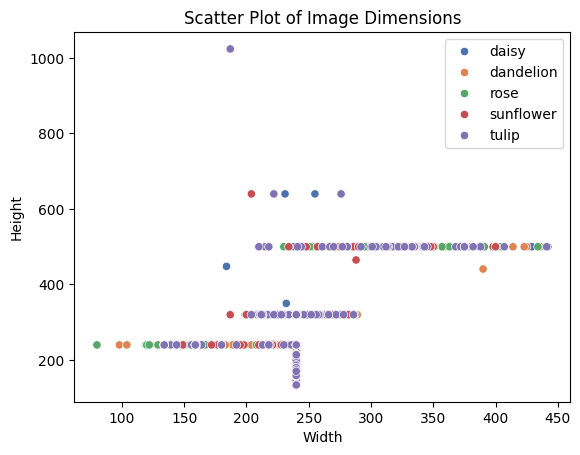

In [24]:
sns.scatterplot(x=x, y=y, hue=hue, palette="deep")
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot of Image Dimensions')
plt.show()

In [25]:
print(np.mean(x), np.mean(y))

252.98841251448437 338.3597914252607


In [42]:
path1=train_path+'/daisy'+"/1031799732_e7f4008c03.jpg"
path1

'/content/drive/MyDrive/DL_assignment/flowers/train//daisy/1031799732_e7f4008c03.jpg'

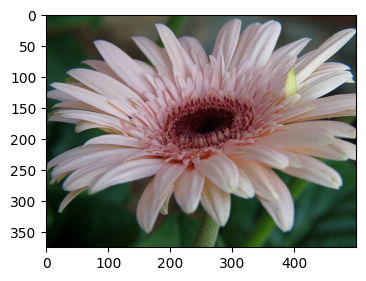

In [43]:
flower_img=imread(path1)
plt.figure(figsize=(4,5))
plt.imshow(flower_img);

In [44]:
path2=train_path+'/daisy'+"/5547758_eea9edfd54_n.jpg"
path2

'/content/drive/MyDrive/DL_assignment/flowers/train//daisy/5547758_eea9edfd54_n.jpg'

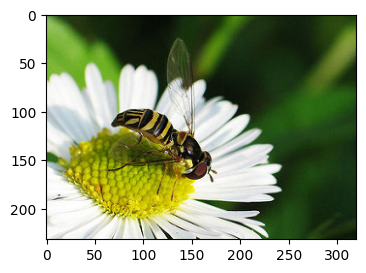

In [45]:
s_flower_img=imread(path2)
plt.figure(figsize=(4,5))
plt.imshow(s_flower_img);

In [46]:
s_img = imread(path2)

s_d1, s_d2, s_colors = s_img.shape
print(s_d1, s_d2, s_colors)

232 320 3


In [47]:
flower_img.max(), flower_img.min()

(255, 0)

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

flower_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allowe horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )
flower_gen

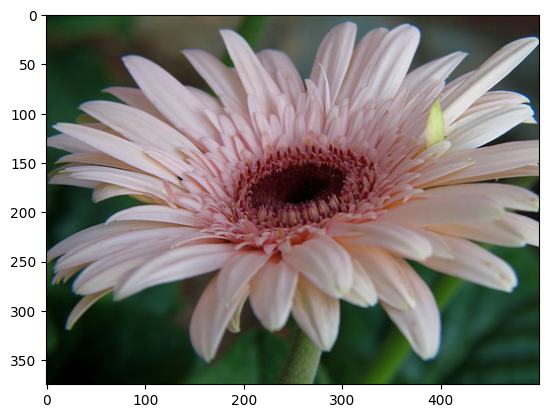

In [49]:
plt.imshow(flower_img)

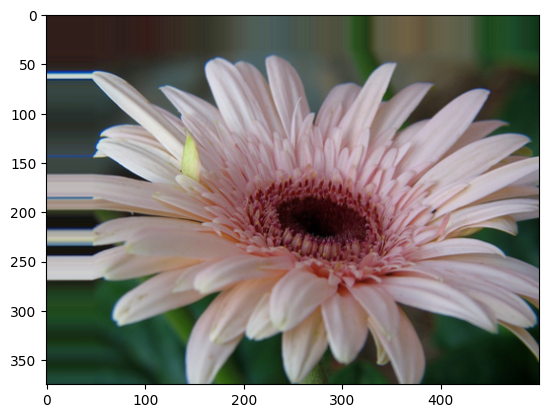

In [50]:
plt.imshow(flower_gen.random_transform(flower_img))

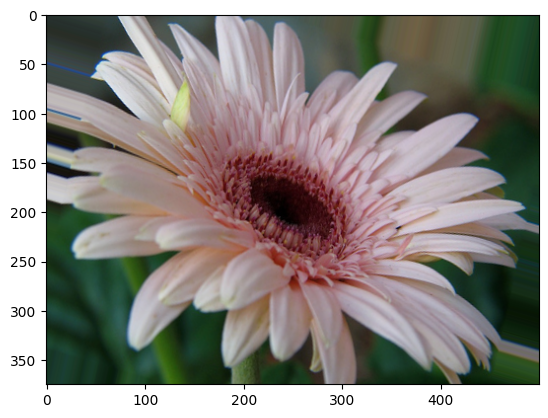

In [61]:
plt.imshow(flower_gen.random_transform(flower_img))

# Create The Model

In [62]:
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [63]:
from tensorflow.keras.layers import BatchNormalization

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# If early stopping is triggered during training, restore_best_weights replaces
# the model's weights with the weights that gave the best value for the monitored metric.
# If the loss value starts increasing after a certain point and causes the model to stop,
# this parameter ensures that the weights are replaced with the score where the loss value was lowest.

## Train Images

In [66]:
batch_size = 32
train_flower_gen = flower_gen.flow_from_directory(train_path,

                                               target_size=(224,224),

                                               color_mode='rgb',

                                               batch_size=batch_size,

                                               class_mode='sparse', shuffle=True)

Found 3452 images belonging to 5 classes.


## Test Images

In [67]:
flower_gen_test = ImageDataGenerator()

test_flower_gen = flower_gen_test.flow_from_directory(test_path,

                                                   target_size=(224,224),

                                                   color_mode='rgb',

                                                   batch_size=batch_size,

                                                   class_mode='sparse', shuffle=True)

Found 865 images belonging to 5 classes.


# VGG16

In [68]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

# Define the input shape (height, width, channels)
image_shape = (224, 224, 3)

# Build the model using Sequential
vgg16_model = Sequential()

# Add an Input layer to explicitly specify the input shape
vgg16_model.add(Input(shape=image_shape))

# Load the VGG16 model with pre-trained ImageNet weights, without the top layers
pretrained_model = VGG16(include_top=False, weights='imagenet', pooling='avg')

# Set the pre-trained model layers to be non-trainable
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pre-trained VGG16 model to the Sequential model
vgg16_model.add(pretrained_model)

# Add custom Dense layers
vgg16_model.add(Dense(128, activation='relu'))
vgg16_model.add(Dense(5, activation='softmax'))

# Compile the model
vgg16_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Show the summary of the model
vgg16_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,997 (56.39 MB)

 Trainable params: 66,309 (259.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [69]:
history_vgg16 = vgg16_model.fit(
    train_flower_gen,
    epochs=10,
    validation_data=test_flower_gen,
    callbacks=[early_stop]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 98s 735ms/step - accuracy: 0.4817 - loss: 1.3296 - val_accuracy: 0.6462 - val_loss: 8.1556
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 109s 560ms/step - accuracy: 0.7175 - loss: 0.8352 - val_accuracy: 0.6428 - val_loss: 10.7327
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 88s 614ms/step - accuracy: 0.7641 - loss: 0.6809 - val_accuracy: 0.6462 - val_loss: 12.7389
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 76s 561ms/step - accuracy: 0.7776 - loss: 0.6530 - val_accuracy: 0.6312 - val_loss: 15.6598


In [70]:
summary = pd.DataFrame(vgg16_model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.579374,1.139763,0.646243,8.155561
1,0.726825,0.794720,0.642775,10.732723
2,0.766222,0.673324,0.646243,12.738866
3,0.780707,0.633426,0.631214,15.659776


In [71]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=summary)

https://docs.google.com/spreadsheets/d/1bzPFlsJpO6L5x9MSsLyYOXssa8FjGHbMn2ELIVoz_Hc#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [72]:
# evaluate model
vgg16_model.evaluate(test_flower_gen)

28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.6694 - loss: 7.7114


[8.155562400817871, 0.6462427973747253]

In [73]:
# Define the path where you want to save the model
model_save_path = '/content/drive/MyDrive/DL_assignment/vgg16_model.h5'

# Save the model
vgg16_model.save(model_save_path)


# Model Performance

In [74]:
import matplotlib.pyplot as plt

def plot_model_performance(history, title='Model Performance'):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Acc')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

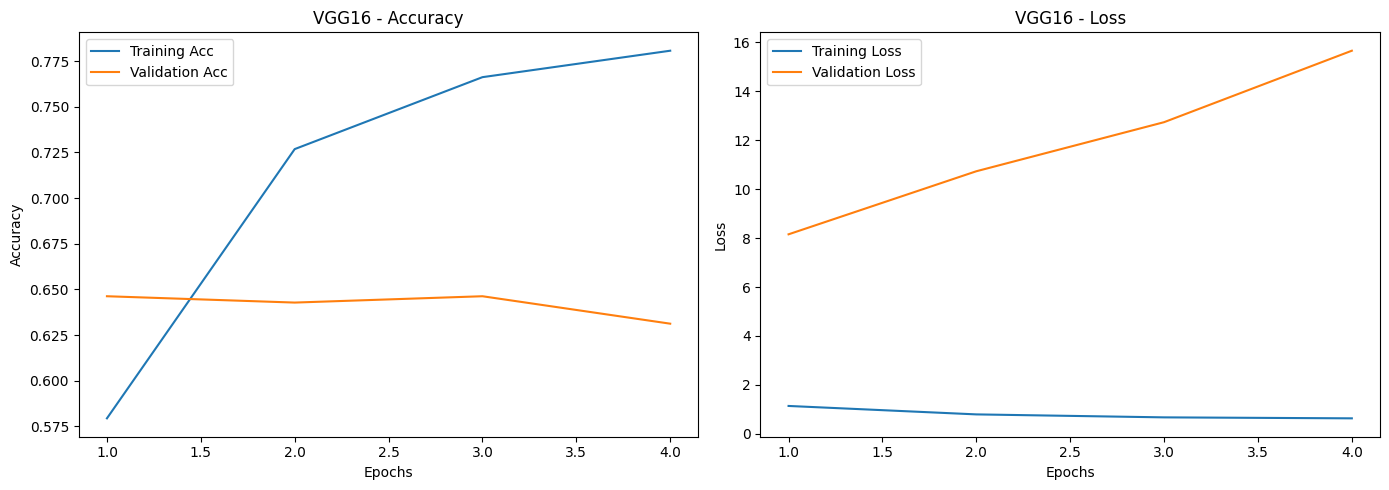

In [75]:
plot_model_performance(history_vgg16, 'VGG16') #updated the performance

28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step


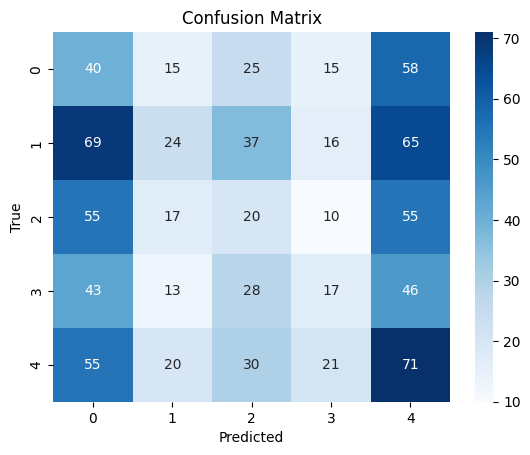

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on test data
y_pred = vgg16_model.predict(test_flower_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(test_flower_gen.labels, y_pred_classes)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [77]:
from sklearn.metrics import classification_report

# Generate classification report
print(classification_report(test_flower_gen.labels, y_pred_classes))


              precision    recall  f1-score   support

           0       0.15      0.26      0.19       153
           1       0.27      0.11      0.16       211
           2       0.14      0.13      0.13       157
           3       0.22      0.12      0.15       147
           4       0.24      0.36      0.29       197

    accuracy                           0.20       865
   macro avg       0.20      0.20      0.19       865
weighted avg       0.21      0.20      0.19       865



28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step


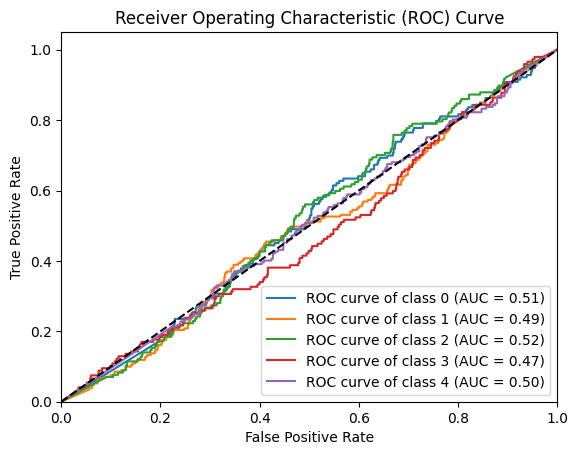

In [81]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# num of classes
num_classes = 5

# Binarize the output
y_true = label_binarize(test_flower_gen.labels, classes=[0, 1, 2, 3, 4])
y_score = vgg16_model.predict(test_flower_gen)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Predicting on an Image

In [79]:
train_flower_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
Predicted class: rose


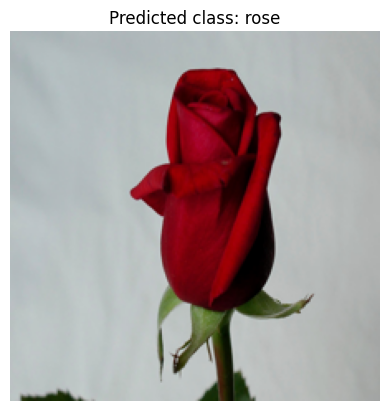

In [82]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Open the image file
image_path = '/content/drive/MyDrive/DL_assignment/rose.jpg'
image = Image.open(image_path)

# Resize the image to the required input size of the model
image = image.resize((224, 224))

# Convert the image to an array and normalize the pixel values
image_array = np.array(image.convert('RGB')) / 255.0

# Add a batch dimension to the image array
image_array = np.expand_dims(image_array, axis=0)

# Make a prediction using the pre-trained ResNet model
prediction = vgg16_model.predict(image_array)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Get the class names from train_flower_gen.class_indices
class_names = {v: k for k, v in train_flower_gen.class_indices.items()}
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class
print('Predicted class:', predicted_class_name)

# Display the image with the predicted class name
plt.imshow(image)
plt.title(f'Predicted class: {predicted_class_name}')
plt.axis('off')  # Hide the axis
plt.show()
